## California Housing Data

In [2]:
import pandas as pd
data=pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

lb=LabelEncoder()
data.ocean_proximity=lb.fit_transform(data.ocean_proximity)

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [7]:
miss = pd.DataFrame({'Col_name': data.columns, 'Missing_Value': [any(data[x].isnull()) for x in data.columns],
                    'Count_': [sum(data[y].isnull()) for y in data.columns]})

In [8]:
miss

,Col_name,Missing_Value,Count_
0,longitude,False,0
1,latitude,False,0
2,housing_median_age,False,0
3,total_rooms,False,0
4,total_bedrooms,True,207
5,population,False,0
6,households,False,0
7,median_income,False,0
8,median_house_value,False,0
9,ocean_proximity,False,0


In [9]:
data.shape

(20640, 10)

In [10]:
data.dropna(inplace=True)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
'median_income' ]], diag_kind="kde")

plt.show()

<Figure size 1500x1500 with 42 Axes>

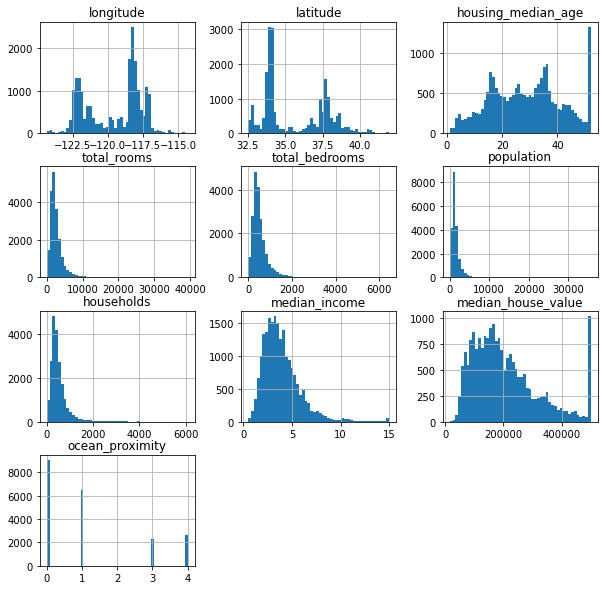

In [12]:
data.hist(bins=50, figsize=(10, 10))
plt.show()

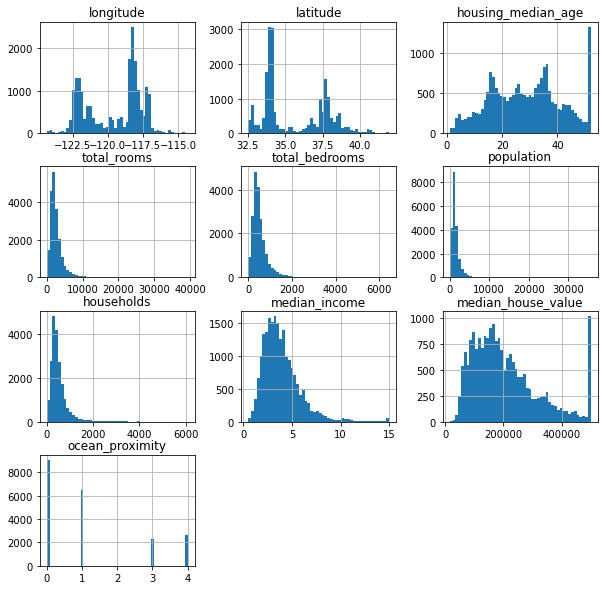

In [13]:
data.hist(bins=50, figsize=(10, 10))
plt.show()

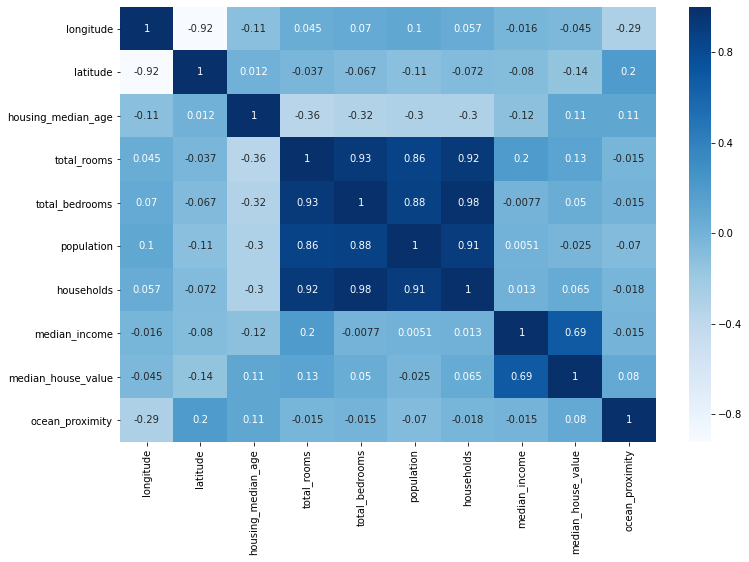

In [14]:
import seaborn as sns
corr = pd.DataFrame(data).corr()
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,cmap='Blues')
plt.show()

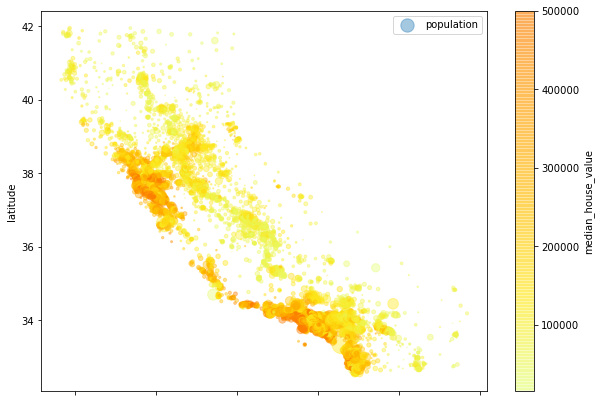

In [15]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
 s=data.population/100, label='population', figsize=(10,7),
 c='median_house_value', cmap=plt.get_cmap('Wistia'), colorbar=True)
plt.show()

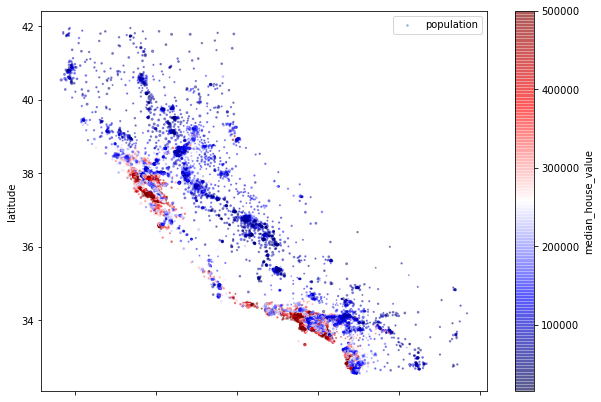

In [17]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
         s=data.housing_median_age/10, label='population', figsize=(10,7),
         c='median_house_value', cmap=plt.get_cmap('seismic'), colorbar=True)
plt.show()

In [19]:
X_train, X_test, y_train,y_test=train_test_split(data.drop('median_house_value',axis=1),data.median_house_value, test_size=0.3,random_state=101)

In [20]:
X_train.shape

(14303, 9)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)    

    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae','mse'])
    return model

In [24]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________


In [25]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
EPOCHS=200

history = model.fit(X_train, y_train,epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[tensorflow_docs.modeling.EpochDots(20)])


Epoch: 0, loss:31578746880.0000,  mae:133622.5625,  mse:31578746880.0000,  val_loss:26425100288.0000,  val_mae:115337.0156,  val_mse:26425100288.0000,  
....................
Epoch: 20, loss:7622817792.0000,  mae:67664.5391,  mse:7622817792.0000,  val_loss:7738067968.0000,  val_mae:67613.3359,  val_mse:7738067968.0000,  
....................
Epoch: 40, loss:5935566336.0000,  mae:58046.8711,  mse:5935566336.0000,  val_loss:5877322752.0000,  val_mae:57690.3906,  val_mse:5877322752.0000,  
....................
Epoch: 60, loss:5125110272.0000,  mae:52851.6953,  mse:5125110272.0000,  val_loss:5089573376.0000,  val_mae:51277.1758,  val_mse:5089573376.0000,  
....................
Epoch: 80, loss:4867115520.0000,  mae:51585.5039,  mse:4867115520.0000,  val_loss:5180709888.0000,  val_mae:54563.0312,  val_mse:5180709888.0000,  
....................
Epoch: 100, loss:4784320000.0000,  mae:50992.9531,  mse:4784320000.0000,  val_loss:5069024256.0000,  val_mae:50599.5625,  val_mse:5069024256.0000,  


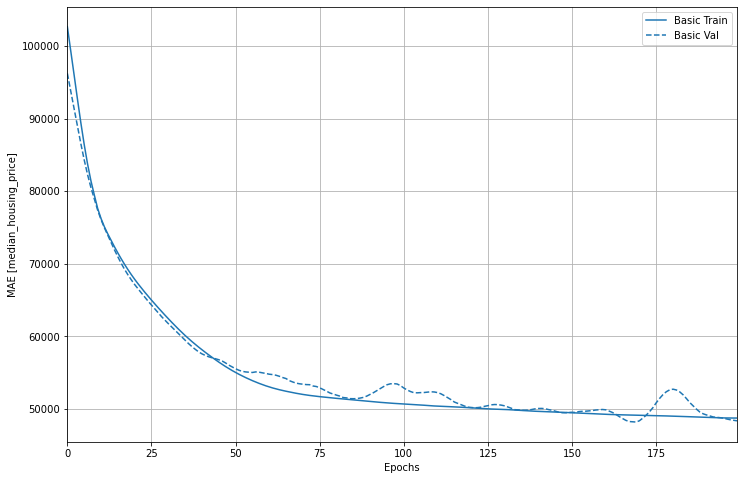

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric='mae')
plt.ylabel('MAE [median_housing_price]')
plt.show()